In [2]:
from googleapiclient.discovery import build
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns

api_key = '' #add google api key here
channel_ids = [
    'UCWCHFXZIRSWT7Y28yj1T0AA',
    'UCbQofpGfudo6nVDG8DyMFtg',
    'UCrk2rBFB41auTTAC_3eZf9Q',
    'UCGwuxdEeCf0TIA2RbPOj-8g',
    'UCnBT5HobLD5_iyHsZNL85Ng',
    'UCXmZkD_OFXayyq8Pr3c13ow',
    'UCfTfuTTALrsxUWjisrdOWtA',
    'UCTPQZm46dXYJ6VcQcd7VahA'
]
youtube = build('youtube', 'v3', developerKey=api_key)


In [3]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_ids)
    )
    response = request.execute()
    for i in range(len(response['items'])):
        data = dict(
            Channel_name=response['items'][i]['snippet']['title'],
            Subscribers=response['items'][i]['statistics']['subscriberCount'],
            Views=response['items'][i]['statistics']['viewCount'],
            Total_videos=response['items'][i]['statistics']['videoCount'],
            playlist_id=response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
        )
        all_data.append(data)
    return all_data

channel_statistics = get_channel_stats(youtube, channel_ids)
channel_data = pd.DataFrame(channel_statistics)

In [4]:
channel_data 

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,University of Toronto,57600,9625783,1198,UUXmZkD_OFXayyq8Pr3c13ow
1,Stanford Graduate School of Business,2290000,156929616,3427,UUGwuxdEeCf0TIA2RbPOj-8g
2,UC Berkeley Inspires,5230,1137556,332,UUnBT5HobLD5_iyHsZNL85Ng
3,UW Sustainability,255,25471,84,UUrk2rBFB41auTTAC_3eZf9Q
4,University of Adelaide,17800,11355137,1117,UUTPQZm46dXYJ6VcQcd7VahA
5,Cornell University,84700,23076794,949,UUfTfuTTALrsxUWjisrdOWtA
6,The University of Melbourne,119000,26189906,2560,UUbQofpGfudo6nVDG8DyMFtg
7,Social Responsibility at The University of Man...,273,95447,341,UUWCHFXZIRSWT7Y28yj1T0AA


In [5]:
keywords = [
    'Environment', 'Eco-friendly', 'Green', 'Climate Change', 
    'Renewable Energy', 'Carbon Footprint', 'Recycling', 'Biodiversity', 
    'Conservation', 'Solar Energy', 'Wind Energy', 'Sustainable Development', 
    'Clean Energy', 'Energy Efficiency', 'Water Conservation', 'Zero Waste', 
    'Organic', 'Ecosystem', 'Pollution', 'Sustainable Agriculture', 
    'Carbon Neutral', 'Global Warming', 'Greenhouse Gas', 'Sustainable Practices', 
    'Electric Vehicles', 'Composting', 'Environmental Protection', 
    'Environmental Impact', 'Deforestation', 'Ecology', 'Sustainable Living', 
    'Renewable Resources', 'Natural Resources', 'Air Quality', 'Sustainable Design', 
    'Environmental Awareness', 'Climate Action', 'Eco-Conscious', 'Sustainable Cities', 
    'Waste Reduction', 'Green Technology', 'Sustainable Materials', 'Green Energy', 
    'Circular Economy', 'Low Carbon', 'Green Building', 'Wildlife Conservation', 
    'Marine Conservation', 'Carbon Emissions', 'Sustainable Transport', 
    'Sustainable Tourism', 'Green Infrastructure', 'Green Products', 
    'Environmental Justice', 'Clean Water', 'Habitat Restoration', 'Carbon Offset', 
    'Eco-Tourism', 'Sustainable Fashion', 'Energy Conservation', 'Green Manufacturing', 
    'Organic Farming', 'Sustainable Supply Chain', 'Climate Resilience', 'Green Policies', 
    'Sustainable Development Goals', 'Eco-Innovation', 'Greenhouse Effect', 
    'Environmental Sustainability', 'Eco-Design', 'Renewable Technologies', 
    'Sustainable Energy', 'Environmental Education', 'Sustainable Architecture', 
    'Green Economy', 'Eco-Labels', 'Environmental Stewardship', 'Climate Mitigation', 
    'Eco-Friendly Products', 'Green Living', 'Environmental Health', 'Sustainable Fisheries', 
    'Sustainable Business', 'Environmental Ethics', 'Climate Adaptation', 'Eco-Friendly Packaging', 
    'Green Chemistry', 'Low Impact', 'Biodegradable', 'Eco-System Services', 
    'Environmental Policy', 'Green Investment', 'Nature Conservation', 'Eco-Management', 
    'Eco-Systems', 'Carbon Sequestration', 'Sustainable Innovation', 'Environmental Science', 
    'Green Jobs', 'Environmental Footprint', 'Resource Efficiency', 'Eco-Friendly Cleaning', 
    'Eco-Conservation', 'Green Procurement', 'Sustainable Mobility'
]

In [6]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='University of Adelaide', 'playlist_id'].iloc[0]
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
               part='contentDetails',
               playlistId = playlist_id,
               maxResults = 50)
    response = request.execute()

    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
         if next_page_token is None:
             more_pages = False
         else:
             request = youtube.playlistItems().list(
                         part='contentDetails',
                         playlistId = playlist_id,
                         maxResults = 50,
                         pageToken = next_page_token)
             response = request.execute()

             for i in range(len(response['items'])):
                 video_ids.append(response['items'][i]['contentDetails']['videoId'])

             next_page_token = response.get('nextPageToken')
    return video_ids
video_ids = get_video_ids(youtube, playlist_id)
#video_ids

def get_videos_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(2, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response= request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                           Published_date = video['snippet']['publishedAt'],
                           Views=video['statistics'].get('viewCount', 0),
                           Likes=video['statistics'].get('likeCount', 0),
                           Comments=video['statistics'].get('commentCount', 0)
                           )

            all_video_stats.append(video_stats)                    

    return all_video_stats
video_details = get_videos_details(youtube, video_ids)
df = pd.DataFrame(video_details)

#Apply filters

df['Published_date'] = pd.to_datetime(df['Published_date'])
# Filter videos published after 2020
df = df[(df['Published_date'] >= '2020-01-01') & (df['Published_date'] <= '2024-06-30')]


pattern = '|'.join(keywords)
filtered_Adelaide = df[df['Title'].str.contains(pattern, case=False, na=False)]
filtered_Adelaide.to_csv('University of Adelaide.csv', index=False)
filtered_Adelaide

,Title,Published_date,Views,Likes,Comments
116,Can we revive our extinct ecosystems with musi...,2023-02-16 02:04:04+00:00,128,0,0
119,Dedication or deception? How greenwashing impa...,2023-02-16 01:56:48+00:00,87,1,0
126,Are agricultural subsidies harming our environ...,2022-10-20 22:58:31+00:00,285,8,0
236,Industrial Greening - Research Tuesdays Februa...,2021-02-09 14:38:26+00:00,789,16,0
281,A Twin Study - The role of genetics and enviro...,2020-04-03 06:58:00+00:00,3189,27,4


In [7]:
filtered_Adelaide['Views'] = filtered_Adelaide['Views'].astype(int)
filtered_Adelaide['Likes'] = filtered_Adelaide['Likes'].astype(int)
filtered_Adelaide['Comments'] = filtered_Adelaide['Comments'].astype(int)
total_likes_Adelaide = filtered_Adelaide['Likes'].sum()
total_comments_Adelaide = filtered_Adelaide['Comments'].sum()
total_views_Adelaide= filtered_Adelaide['Views'].sum()

print("Total Likes:", total_likes_Adelaide)
print("Total Comments:", total_comments_Adelaide)
print("Total Views:", total_views_Adelaide)
Adelaide_total = len(filtered_Adelaide)
Adelaide_total

Total Likes: 52
Total Comments: 4
Total Views: 4478


/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/3925256077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Adelaide['Views'] = filtered_Adelaide['Views'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/3925256077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Adelaide['Likes'] = filtered_Adelaide['Likes'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/3925256077.py:3: SettingWithCopyWarning: 
A value is tryin

5

In [8]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Cornell University', 'playlist_id'].iloc[0]
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
               part='contentDetails',
               playlistId = playlist_id,
               maxResults = 50)
    response = request.execute()

    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
         if next_page_token is None:
             more_pages = False
         else:
             request = youtube.playlistItems().list(
                         part='contentDetails',
                         playlistId = playlist_id,
                         maxResults = 50,
                         pageToken = next_page_token)
             response = request.execute()

             for i in range(len(response['items'])):
                 video_ids.append(response['items'][i]['contentDetails']['videoId'])

             next_page_token = response.get('nextPageToken')
    return video_ids
video_ids = get_video_ids(youtube, playlist_id)
#video_ids

def get_videos_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(2, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response= request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                           Published_date = video['snippet']['publishedAt'],
                           Views=video['statistics'].get('viewCount', 0),
                           Likes=video['statistics'].get('likeCount', 0),
                           Comments=video['statistics'].get('commentCount', 0)
                           )

            all_video_stats.append(video_stats)                    

    return all_video_stats
video_details = get_videos_details(youtube, video_ids)
df = pd.DataFrame(video_details)

#Apply filters

df['Published_date'] = pd.to_datetime(df['Published_date'])
# Filter videos published after 2020
df = df[(df['Published_date'] >= '2020-01-01') & (df['Published_date'] <= '2024-06-30')]


pattern = '|'.join(keywords)
filtered_Cornell = df[df['Title'].str.contains(pattern, case=False, na=False)]
filtered_Cornell.to_csv('University of Cornell.csv', index=False)
filtered_Cornell

,Title,Published_date,Views,Likes,Comments
29,Green agriculture gets a boost from New York’s...,2024-01-16 14:00:06+00:00,2411,29,0
52,Cornell expert discusses poor air quality and ...,2023-06-07 21:19:10+00:00,1467,56,3
182,"PolyForm celebrates mission, spirit of Human E...",2021-05-19 17:35:03+00:00,2190,33,1
191,Climate change reduced farming productivity by...,2021-04-01 15:57:34+00:00,5677,58,36
225,"Cornell Leadership Sessions: Back to green, ca...",2020-09-17 17:36:44+00:00,2570,51,0
274,Minorities consider poverty an environmental i...,2020-03-12 20:05:33+00:00,699,24,4
282,Cornell at AAAS: Predicting biological invasio...,2020-02-12 15:25:07+00:00,388,10,0


In [9]:
filtered_Cornell['Views'] = filtered_Cornell['Views'].astype(int)
filtered_Cornell['Likes'] = filtered_Cornell['Likes'].astype(int)
filtered_Cornell['Comments'] = filtered_Cornell['Comments'].astype(int)
total_likes_Cornell = filtered_Cornell['Likes'].sum()
total_comments_Cornell = filtered_Cornell['Comments'].sum()
total_views_Cornell = filtered_Cornell['Views'].sum()

print("Total Likes:", total_likes_Cornell)
print("Total Comments:", total_comments_Cornell)
print("Total Views:", total_views_Cornell)
Cornell_total = len(filtered_Cornell)
Cornell_total

Total Likes: 261
Total Comments: 44
Total Views: 15402


/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/3546563410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Cornell['Views'] = filtered_Cornell['Views'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/3546563410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Cornell['Likes'] = filtered_Cornell['Likes'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/3546563410.py:3: SettingWithCopyWarning: 
A value is trying to

7

In [10]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='University of Toronto', 'playlist_id'].iloc[0]
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
               part='contentDetails',
               playlistId = playlist_id,
               maxResults = 50)
    response = request.execute()

    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
         if next_page_token is None:
             more_pages = False
         else:
             request = youtube.playlistItems().list(
                         part='contentDetails',
                         playlistId = playlist_id,
                         maxResults = 50,
                         pageToken = next_page_token)
             response = request.execute()

             for i in range(len(response['items'])):
                 video_ids.append(response['items'][i]['contentDetails']['videoId'])

             next_page_token = response.get('nextPageToken')
    return video_ids
video_ids = get_video_ids(youtube, playlist_id)
#video_ids

def get_videos_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(2, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response= request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                           Published_date = video['snippet']['publishedAt'],
                           Views=video['statistics'].get('viewCount', 0),
                           Likes=video['statistics'].get('likeCount', 0),
                           Comments=video['statistics'].get('commentCount', 0)
                           )

            all_video_stats.append(video_stats)                    

    return all_video_stats
video_details = get_videos_details(youtube, video_ids)
df = pd.DataFrame(video_details)

#Apply filters

df['Published_date'] = pd.to_datetime(df['Published_date'])
# Filter videos published after 2020
df = df[(df['Published_date'] >= '2020-01-01') & (df['Published_date'] <= '2024-06-30')]


pattern = '|'.join(keywords)
filtered_Toronto = df[df['Title'].str.contains(pattern, case=False, na=False)]
filtered_Toronto.to_csv('University of Toronto.csv', index=False)
filtered_Toronto

,Title,Published_date,Views,Likes,Comments
59,What is the impact of climate change on the mi...,2024-04-16 13:56:59+00:00,275,8,0
183,Sustainable Future – Challenge Accepted! | Gre...,2023-05-18 14:49:12+00:00,22326,56,2
187,Sustainable Future – Challenge Accepted! | Cli...,2023-05-04 16:06:51+00:00,64296,16,0
189,Campus Question: What are you doing to reduce ...,2023-04-29 23:22:16+00:00,733,19,0
353,Tuesday Tours - Green Spaces at U of T St. Geo...,2021-10-26 18:33:56+00:00,341,4,0
355,Tuesday Tours - Green Spaces at UTSC,2021-10-19 17:13:49+00:00,399,8,0
356,Tuesday Tour: Check out UTM's green spaces!,2021-10-12 20:44:05+00:00,416,8,0
401,"Ken Greenberg, honorary degree recipient, spri...",2021-06-09 15:07:42+00:00,646,11,1


In [11]:
filtered_Toronto['Views'] = filtered_Toronto['Views'].astype(int)
filtered_Toronto['Likes'] = filtered_Toronto['Likes'].astype(int)
filtered_Toronto['Comments'] = filtered_Toronto['Comments'].astype(int)
total_likes_Toronto = filtered_Toronto['Likes'].sum()
total_comments_Toronto = filtered_Toronto['Comments'].sum()
total_views_Toronto = filtered_Toronto['Views'].sum()

print("Total Likes:", total_likes_Toronto)
print("Total Comments:", total_comments_Toronto)
print("Total Views:", total_views_Toronto)
Toronto_total = len(filtered_Toronto)
Toronto_total

Total Likes: 130
Total Comments: 3
Total Views: 89432


/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/955934177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Toronto['Views'] = filtered_Toronto['Views'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/955934177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Toronto['Likes'] = filtered_Toronto['Likes'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/955934177.py:3: SettingWithCopyWarning: 
A value is trying to be

8

In [12]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='The University of Melbourne', 'playlist_id'].iloc[0]
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
               part='contentDetails',
               playlistId = playlist_id,
               maxResults = 50)
    response = request.execute()

    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
         if next_page_token is None:
             more_pages = False
         else:
             request = youtube.playlistItems().list(
                         part='contentDetails',
                         playlistId = playlist_id,
                         maxResults = 50,
                         pageToken = next_page_token)
             response = request.execute()

             for i in range(len(response['items'])):
                 video_ids.append(response['items'][i]['contentDetails']['videoId'])

             next_page_token = response.get('nextPageToken')
    return video_ids
video_ids = get_video_ids(youtube, playlist_id)
#video_ids

def get_videos_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(2, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response= request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                           Published_date = video['snippet']['publishedAt'],
                           Views=video['statistics'].get('viewCount', 0),
                           Likes=video['statistics'].get('likeCount', 0),
                           Comments=video['statistics'].get('commentCount', 0)
                           )

            all_video_stats.append(video_stats)                    

    return all_video_stats
video_details = get_videos_details(youtube, video_ids)
df = pd.DataFrame(video_details)

#Apply filters

df['Published_date'] = pd.to_datetime(df['Published_date'])
# Filter videos published after 2020
df = df[(df['Published_date'] >= '2020-01-01') & (df['Published_date'] <= '2024-06-30')]


pattern = '|'.join(keywords)
filtered_Melbourn = df[df['Title'].str.contains(pattern, case=False, na=False)]
filtered_Melbourn.to_csv('University of Melbourn.csv', index=False)
filtered_Melbourn

,Title,Published_date,Views,Likes,Comments
64,Climate Kids: How did climate change start?,2024-05-31 03:33:16+00:00,1248,30,0
65,MCF Seminar Series: The 2022 Climate Change Ac...,2024-05-30 05:18:26+00:00,276,4,0
106,MCFA Seminar Series: Climate Change and Intern...,2023-12-06 22:37:45+00:00,249,8,0
121,Discover the Environmental Engineering Systems...,2023-11-14 03:11:14+00:00,490,4,0
155,MCFA Seminar Series: First Nations' voices and...,2023-09-21 04:35:08+00:00,207,6,0
213,Are nature-based carbon offsets based on good ...,2023-07-31 03:53:25+00:00,824,9,1
225,University of Melbourne Health and Biomedical ...,2023-06-16 06:50:22+00:00,413,8,1
258,MCFA Seminar Series: The visual life of climat...,2023-03-14 01:24:44+00:00,277,2,0
261,MEA & The University of Melbourne – Supporting...,2023-03-13 22:52:32+00:00,40307,1,0
280,"Mothering in Crisis: Family, Disaster and Clim...",2022-12-07 03:23:12+00:00,352,7,1


In [13]:
filtered_Melbourn['Views'] = filtered_Melbourn['Views'].astype(int)
filtered_Melbourn['Likes'] = filtered_Melbourn['Likes'].astype(int)
filtered_Melbourn['Comments'] = filtered_Melbourn['Comments'].astype(int)
total_likes_Melbourn = filtered_Melbourn['Likes'].sum()
total_comments_Melbourn = filtered_Melbourn['Comments'].sum()
total_views_Melbourn = filtered_Melbourn['Views'].sum()

print("Total Likes:", total_likes_Melbourn)
print("Total Comments:", total_comments_Melbourn)
print("Total Views:", total_views_Melbourn)

Total Likes: 232
Total Comments: 9
Total Views: 51968


/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/1840309755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Melbourn['Views'] = filtered_Melbourn['Views'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/1840309755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Melbourn['Likes'] = filtered_Melbourn['Likes'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/1840309755.py:3: SettingWithCopyWarning: 
A value is tryin

In [14]:
Melbourn_total = len(filtered_Melbourn)
Melbourn_total

25

In [15]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='UC Berkeley Inspires', 'playlist_id'].iloc[0]
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
               part='contentDetails',
               playlistId = playlist_id,
               maxResults = 50)
    response = request.execute()

    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
         if next_page_token is None:
             more_pages = False
         else:
             request = youtube.playlistItems().list(
                         part='contentDetails',
                         playlistId = playlist_id,
                         maxResults = 50,
                         pageToken = next_page_token)
             response = request.execute()

             for i in range(len(response['items'])):
                 video_ids.append(response['items'][i]['contentDetails']['videoId'])

             next_page_token = response.get('nextPageToken')
    return video_ids
video_ids = get_video_ids(youtube, playlist_id)
#video_ids

def get_videos_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(2, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response= request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                           Published_date = video['snippet']['publishedAt'],
                           Views=video['statistics'].get('viewCount', 0),
                           Likes=video['statistics'].get('likeCount', 0),
                           Comments=video['statistics'].get('commentCount', 0)
                           )

            all_video_stats.append(video_stats)                    

    return all_video_stats
video_details = get_videos_details(youtube, video_ids)
df = pd.DataFrame(video_details)

#Apply filters

df['Published_date'] = pd.to_datetime(df['Published_date'])
# Filter videos published after 2020
df = df[(df['Published_date'] >= '2020-01-01') & (df['Published_date'] <= '2024-06-30')]



pattern = '|'.join(keywords)
filtered_Berkley = df[df['Title'].str.contains(pattern, case=False, na=False)]
filtered_Berkley.to_csv('University of Berkley.csv', index=False)
filtered_Berkley

,Title,Published_date,Views,Likes,Comments
24,Water and Carbon Capture for Climate Resilience,2024-03-01 22:19:57+00:00,513,15,0
33,How Climate Change Affects You,2023-11-09 01:17:53+00:00,181,5,1
74,"Coping with Global Warming: Past, Present, and...",2022-10-18 20:10:56+00:00,274,4,0
171,"Light the Way Salon: Energy, Climate and the E...",2021-02-28 02:34:27+00:00,163,3,0
183,UC Berkeley Light the Way Global Celebration: ...,2020-11-20 17:48:14+00:00,140,4,0
189,Robinson gift supports biotech ecosystem on UC...,2020-10-28 13:20:46+00:00,1069,9,0
219,What did COVID-19 do to the Bay Area’s air qua...,2020-08-16 15:00:55+00:00,3795,45,1


In [16]:
filtered_Berkley['Views'] = filtered_Berkley['Views'].astype(int)
filtered_Berkley['Likes'] = filtered_Berkley['Likes'].astype(int)
filtered_Berkley['Comments'] = filtered_Berkley['Comments'].astype(int)
total_likes_Berkley = filtered_Berkley['Likes'].sum()
total_comments_Berkley = filtered_Berkley['Comments'].sum()
total_views_Berkley = filtered_Berkley['Views'].sum()

print("Total Likes:", total_likes_Berkley)
print("Total Comments:", total_comments_Berkley)
print("Total Views:", total_views_Berkley)

Total Likes: 85
Total Comments: 2
Total Views: 6135


/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/2446324992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Berkley['Views'] = filtered_Berkley['Views'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/2446324992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Berkley['Likes'] = filtered_Berkley['Likes'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/2446324992.py:3: SettingWithCopyWarning: 
A value is trying to

In [17]:
Berkley_total = len(filtered_Berkley)
Berkley_total

7

In [18]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Stanford Graduate School of Business', 'playlist_id'].iloc[0]
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
               part='contentDetails',
               playlistId = playlist_id,
               maxResults = 50)
    response = request.execute()

    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
         if next_page_token is None:
             more_pages = False
         else:
             request = youtube.playlistItems().list(
                         part='contentDetails',
                         playlistId = playlist_id,
                         maxResults = 50,
                         pageToken = next_page_token)
             response = request.execute()

             for i in range(len(response['items'])):
                 video_ids.append(response['items'][i]['contentDetails']['videoId'])

             next_page_token = response.get('nextPageToken')
    return video_ids
video_ids = get_video_ids(youtube, playlist_id)
#video_ids

def get_videos_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(2, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response= request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                           Published_date = video['snippet']['publishedAt'],
                           Views=video['statistics'].get('viewCount', 0),
                           Likes=video['statistics'].get('likeCount', 0),
                           Comments=video['statistics'].get('commentCount', 0)
                           )

            all_video_stats.append(video_stats)                    

    return all_video_stats
video_details = get_videos_details(youtube, video_ids)
df = pd.DataFrame(video_details)

#Apply filters

df['Published_date'] = pd.to_datetime(df['Published_date'])
# Filter videos published after 2020
df = df[(df['Published_date'] >= '2020-01-01') & (df['Published_date'] <= '2024-06-30')]



pattern = '|'.join(keywords)
filtered_Stanford = df[df['Title'].str.contains(pattern, case=False, na=False)]
filtered_Stanford.to_csv('University of Stanford.csv', index=False)
filtered_Stanford
filtered_Stanford['Views'] = filtered_Stanford['Views'].astype(int)
filtered_Stanford['Likes'] = filtered_Stanford['Likes'].astype(int)
filtered_Stanford['Comments'] = filtered_Stanford['Comments'].astype(int)
total_likes_Stanford = filtered_Stanford['Likes'].sum()
total_comments_Stanford = filtered_Stanford['Comments'].sum()
total_views_Stanford = filtered_Stanford['Views'].sum()

print("Total Likes:", total_likes_Stanford)
print("Total Comments:", total_comments_Stanford)
print("Total Views:", total_views_Stanford)

Total Likes: 495
Total Comments: 44
Total Views: 116230


/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/1498455177.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Stanford['Views'] = filtered_Stanford['Views'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/1498455177.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Stanford['Likes'] = filtered_Stanford['Likes'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/1498455177.py:74: SettingWithCopyWarning: 
A value is tr

In [19]:
Stanford_total = len(filtered_Stanford)
Stanford_total

32

In [20]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Social Responsibility at The University of Manchester', 'playlist_id'].iloc[0]
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
               part='contentDetails',
               playlistId = playlist_id,
               maxResults = 50)
    response = request.execute()

    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
         if next_page_token is None:
             more_pages = False
         else:
             request = youtube.playlistItems().list(
                         part='contentDetails',
                         playlistId = playlist_id,
                         maxResults = 50,
                         pageToken = next_page_token)
             response = request.execute()

             for i in range(len(response['items'])):
                 video_ids.append(response['items'][i]['contentDetails']['videoId'])

             next_page_token = response.get('nextPageToken')
    return video_ids
video_ids = get_video_ids(youtube, playlist_id)
#video_ids

def get_videos_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(2, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response= request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                           Published_date = video['snippet']['publishedAt'],
                           Views=video['statistics'].get('viewCount', 0),
                           Likes=video['statistics'].get('likeCount', 0),
                           Comments=video['statistics'].get('commentCount', 0)
                           )

            all_video_stats.append(video_stats)                    

    return all_video_stats
video_details = get_videos_details(youtube, video_ids)
df = pd.DataFrame(video_details)

#Apply filters

df['Published_date'] = pd.to_datetime(df['Published_date'])
# Filter videos published after 2020
df = df[(df['Published_date'] >= '2020-01-01') & (df['Published_date'] <= '2024-06-30')]



pattern = '|'.join(keywords)
filtered_Manchester = df[df['Title'].str.contains(pattern, case=False, na=False)]
filtered_Manchester.to_csv('University of Manchester.csv', index=False)
filtered_Manchester

,Title,Published_date,Views,Likes,Comments
7,The University of Manchester supporting local ...,2024-05-20 14:55:10+00:00,128,2,0
13,Outstanding contribution to social and environ...,2024-05-09 19:11:07+00:00,69,0,0
18,Outstanding contribution to environmental sust...,2024-05-09 17:53:47+00:00,42,0,0
24,Outstanding teaching innovation in social resp...,2024-05-09 17:21:45+00:00,88,0,0
34,Students: find out how to use your course asse...,2024-02-01 14:12:30+00:00,165,2,0
35,How could our University Living Lab enhance yo...,2024-02-01 14:06:11+00:00,372,0,0
47,Greening labs - Making the SMI Hub genuinely s...,2023-11-13 23:54:52+00:00,40,0,0
60,Greening Labs – Manchester Evening News interview,2023-10-26 13:10:02+00:00,30,0,0
74,Outstanding public contribution: Ardwick Clima...,2023-05-11 18:51:21+00:00,102,0,0
79,Outstanding contribution to social innovation ...,2023-05-11 18:25:00+00:00,89,0,0


In [21]:
filtered_Manchester['Views'] = filtered_Manchester['Views'].astype(int)
filtered_Manchester['Likes'] = filtered_Manchester['Likes'].astype(int)
filtered_Manchester['Comments'] = filtered_Manchester['Comments'].astype(int)
total_likes_Manchester = filtered_Manchester['Likes'].sum()
total_comments_Manchester = filtered_Manchester['Comments'].sum()
total_views_Manchester = filtered_Manchester['Views'].sum()

print("Total Likes:", total_likes_Manchester)
print("Total Comments:", total_comments_Manchester)
print("Total Views:", total_views_Manchester)

Total Likes: 51
Total Comments: 0
Total Views: 5083


/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/3513215214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Manchester['Views'] = filtered_Manchester['Views'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/3513215214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Manchester['Likes'] = filtered_Manchester['Likes'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/3513215214.py:3: SettingWithCopyWarning: 
A value 

In [22]:
Manchester_total = len(filtered_Manchester)
Manchester_total

27

In [23]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='UW Sustainability', 'playlist_id'].iloc[0]
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
               part='contentDetails',
               playlistId = playlist_id,
               maxResults = 50)
    response = request.execute()

    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
         if next_page_token is None:
             more_pages = False
         else:
             request = youtube.playlistItems().list(
                         part='contentDetails',
                         playlistId = playlist_id,
                         maxResults = 50,
                         pageToken = next_page_token)
             response = request.execute()

             for i in range(len(response['items'])):
                 video_ids.append(response['items'][i]['contentDetails']['videoId'])

             next_page_token = response.get('nextPageToken')
    return video_ids
video_ids = get_video_ids(youtube, playlist_id)
#video_ids

def get_videos_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(2, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response= request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                           Published_date = video['snippet']['publishedAt'],
                           Views=video['statistics'].get('viewCount', 0),
                           Likes=video['statistics'].get('likeCount', 0),
                           Comments=video['statistics'].get('commentCount', 0)
                           )

            all_video_stats.append(video_stats)                    

    return all_video_stats
video_details = get_videos_details(youtube, video_ids)
df = pd.DataFrame(video_details)

#Apply filters

df['Published_date'] = pd.to_datetime(df['Published_date'])
# Filter videos published after 2020
df = df[(df['Published_date'] >= '2020-01-01') & (df['Published_date'] <= '2024-06-30')]


pattern = '|'.join(keywords)
filtered_washington = df[df['Title'].str.contains(pattern, case=False, na=False)]
filtered_washington.to_csv('University of Washington.csv', index=False)
filtered_washington

,Title,Published_date,Views,Likes,Comments
2,Creating a Sustainable Campus: UW's new Green ...,2024-05-22 17:07:23+00:00,63,1,1
7,Creating a Sustainable Campus: Student move-ou...,2024-02-15 23:26:18+00:00,39,1,0
9,UW Greenhouse Gas emissions webinar,2023-12-15 00:14:47+00:00,114,2,0
15,UW Green Office: Going Paperless,2022-04-30 00:32:54+00:00,24,2,0
17,UW Recycling: Green Office Trash Talk,2021-11-17 23:44:24+00:00,51,0,0
19,Husky Green Award celebration,2021-10-21 10:45:51+00:00,92,2,0
22,Sustainability Stories: Waste Reduction,2021-05-05 18:55:04+00:00,57,0,0
34,UW Recycling campus Green Space tour,2020-11-30 23:10:58+00:00,106,2,0
41,"Post-screening discussion of ""The Story of Pla...",2020-07-13 18:42:38+00:00,71,0,0
45,Q&A with Susan Thoman of the Compost Manufactu...,2020-05-14 04:41:19+00:00,104,1,0


In [24]:
filtered_washington['Views'] = filtered_washington['Views'].astype(int)
filtered_washington['Likes'] = filtered_washington['Likes'].astype(int)
filtered_washington['Comments'] = filtered_washington['Comments'].astype(int)
total_likes_washington = filtered_washington['Likes'].sum()
total_comments_washington = filtered_washington['Comments'].sum()
total_views_washington = filtered_washington['Views'].sum()
print("Total Likes:", total_likes_washington)
print("Total Comments:", total_comments_washington)
print("Total Views:", total_views_washington)

Total Likes: 14
Total Comments: 1
Total Views: 883


/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/880325023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_washington['Views'] = filtered_washington['Views'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/880325023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_washington['Likes'] = filtered_washington['Likes'].astype(int)
/var/folders/y2/ptx7cj557677j5gj_rh5gs000000gn/T/ipykernel_3673/880325023.py:3: SettingWithCopyWarning: 
A value is 

In [25]:
washington_total = len(filtered_washington)
washington_total

12

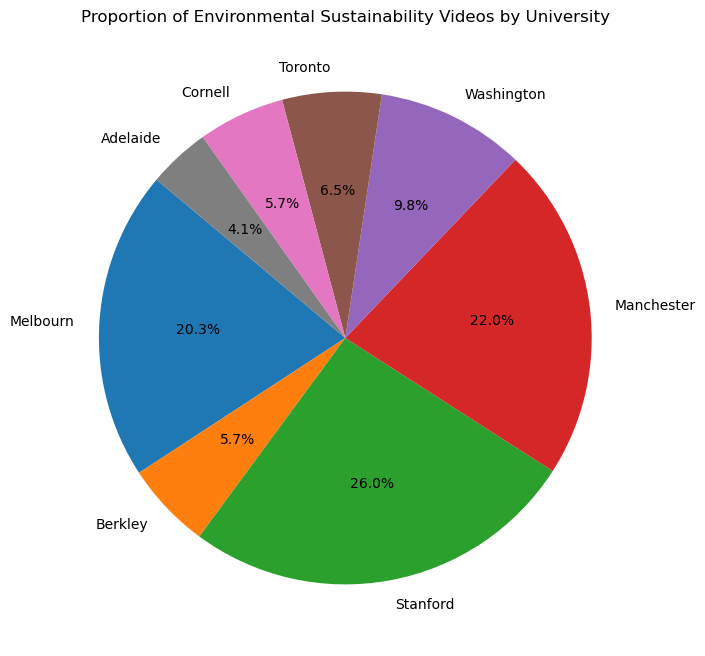

In [26]:

# Creating a pie chart
data = {
    'University': ['Melbourn', 'Berkley', 'Stanford', 'Manchester', 'Washington', 'Toronto','Cornell', 'Adelaide'],
    'Videos': [len(filtered_Melbourn), len(filtered_Berkley), len(filtered_Stanford), len(filtered_Manchester), len(filtered_washington), len(filtered_Toronto), len(filtered_Cornell), len(filtered_Adelaide)]
}

df_pie = pd.DataFrame(data)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_pie['Videos'], labels=df_pie['University'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Environmental Sustainability Videos by University')
plt.savefig('proportion_of_videos_by_university.png')
plt.show()

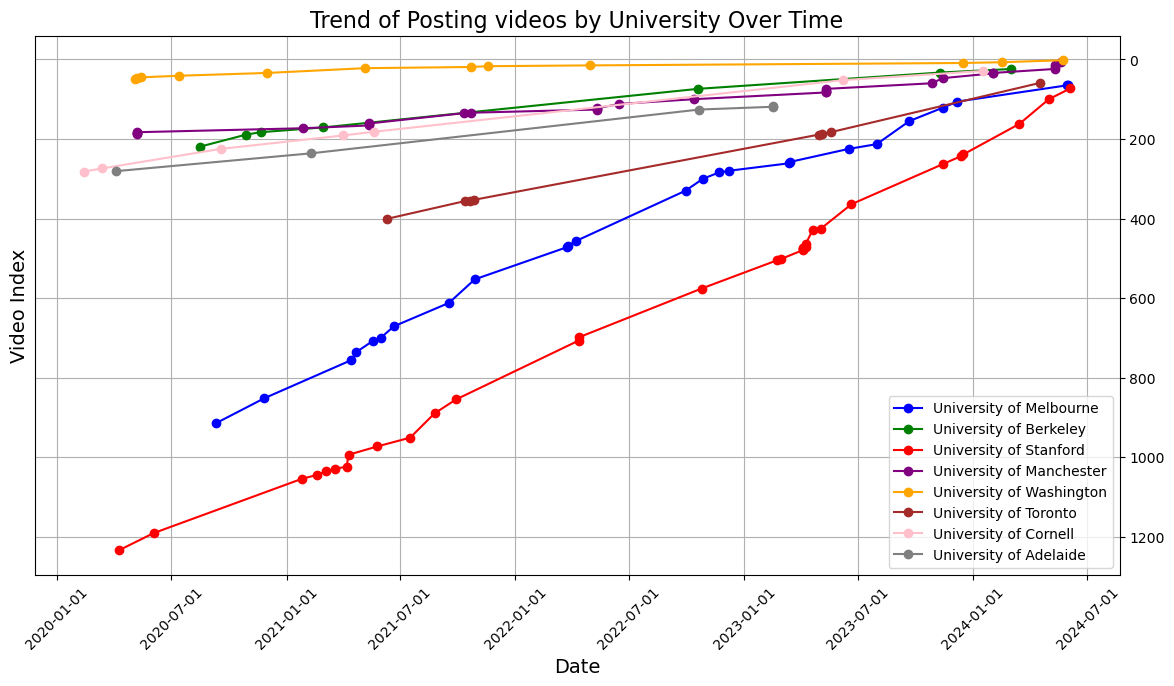

In [27]:


# Trend of videos in Graph
plt.figure(figsize=(14, 7))

# Plotting the data for each university with clear labels and distinct colors
plt.plot(filtered_Melbourn['Published_date'], filtered_Melbourn.index, linestyle='-', marker='o', label='University of Melbourne', color='blue')
plt.plot(filtered_Berkley['Published_date'], filtered_Berkley.index, linestyle='-', marker='o', label='University of Berkeley', color='green')
plt.plot(filtered_Stanford['Published_date'], filtered_Stanford.index, linestyle='-', marker='o', label='University of Stanford', color='red')
plt.plot(filtered_Manchester['Published_date'], filtered_Manchester.index, linestyle='-', marker='o', label='University of Manchester', color='purple')
plt.plot(filtered_washington['Published_date'], filtered_washington.index, linestyle='-', marker='o', label='University of Washington', color='orange')
plt.plot(filtered_Toronto['Published_date'], filtered_Toronto.index, linestyle='-', marker='o', label='University of Toronto', color='brown')
plt.plot(filtered_Cornell['Published_date'], filtered_Cornell.index, linestyle='-', marker='o', label='University of Cornell', color='pink')
plt.plot(filtered_Adelaide['Published_date'], filtered_Adelaide.index, linestyle='-', marker='o', label='University of Adelaide', color='grey')

# Setting the title and labels
plt.title('Trend of Posting videos by University Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Video Index', fontsize=14)

# Enabling grid for better readability
plt.grid(True)

# Formatting the x-axis for date representation
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Adding legend to indicate which line represents which university
plt.legend()

# Inverting y-axis to show the most recent video at the top
plt.gca().invert_yaxis()

# Moving y-axis ticks to the right for better alignment with labels
plt.gca().yaxis.tick_right()

# Saving the figure and displaying the plot
plt.savefig('environmental_sustainability_videos_over_time.png')
plt.show()


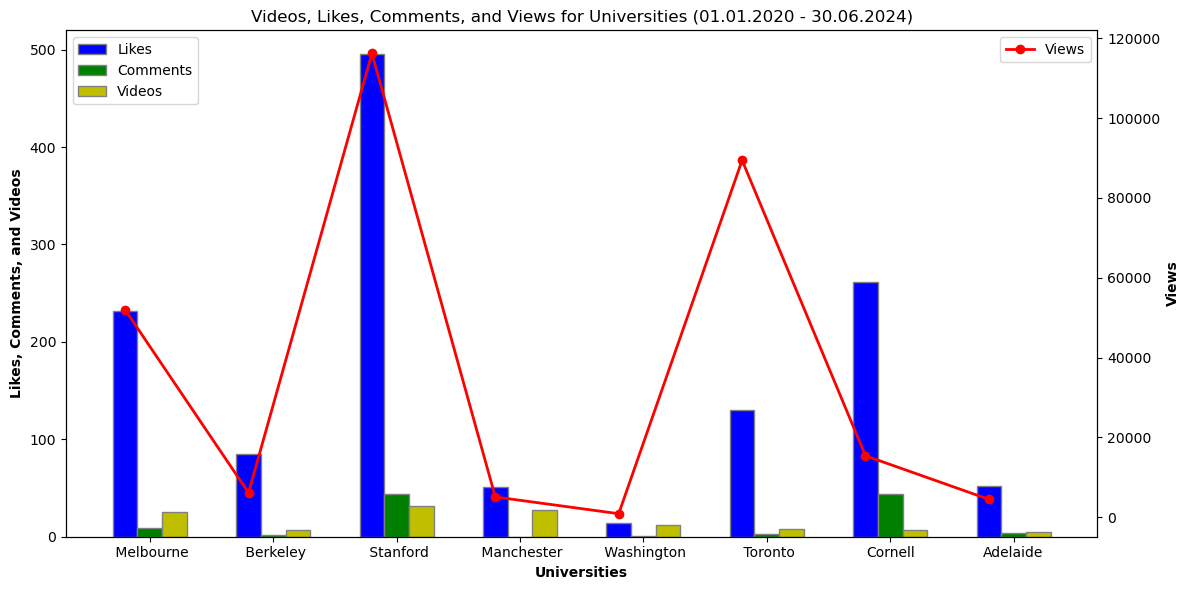

In [28]:

data = {
    'University': [' Melbourne', ' Berkeley', ' Stanford', ' Manchester', ' Washington', ' Toronto', 'Cornell', 'Adelaide'],
    'Likes': [total_likes_Melbourn, total_likes_Berkley, total_likes_Stanford, total_likes_Manchester, total_likes_washington, total_likes_Toronto, total_likes_Cornell, total_likes_Adelaide],
    'Comments': [total_comments_Melbourn, total_comments_Berkley, total_comments_Stanford, total_comments_Manchester, total_comments_washington, total_comments_Toronto, total_comments_Cornell, total_comments_Adelaide],
    'Views': [total_views_Melbourn, total_views_Berkley, total_views_Stanford, total_views_Manchester, total_views_washington, total_views_Toronto, total_views_Cornell, total_views_Adelaide],
'Videos': [len(filtered_Melbourn), len(filtered_Berkley), len(filtered_Stanford), len(filtered_Manchester), len(filtered_washington),len(filtered_Toronto), len(filtered_Cornell), len(filtered_Adelaide)]
}

df = pd.DataFrame(data)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars
r1 = range(len(df['University']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting Likes, Comments, and Videos on the primary y-axis
ax1.set_xlabel('Universities', fontweight='bold')
ax1.set_ylabel('Likes, Comments, and Videos', fontweight='bold')
ax1.bar(r1, df['Likes'], color='b', width=bar_width, edgecolor='grey', label='Likes')
ax1.bar(r2, df['Comments'], color='g', width=bar_width, edgecolor='grey', label='Comments')
ax1.bar(r3, df['Videos'], color='y', width=bar_width, edgecolor='grey', label='Videos')

# Creating a secondary y-axis for Views
ax2 = ax1.twinx()
ax2.set_ylabel('Views', fontweight='bold')
ax2.plot(r1, df['Views'], color='r', marker='o', linestyle='-', linewidth=2, label='Views')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adding title
plt.title('Videos, Likes, Comments, and Views for Universities (01.01.2020 - 30.06.2024)')

# Rotating x-axis labels for better readability
plt.xticks([r + bar_width for r in range(len(df['University']))], df['University'], rotation=45)

# Show the plot
plt.tight_layout()
plt.savefig('university_engagements.png')
plt.show()